In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
plot_out_dir = '../site/kieranfmaguire.github.io/assets/images'

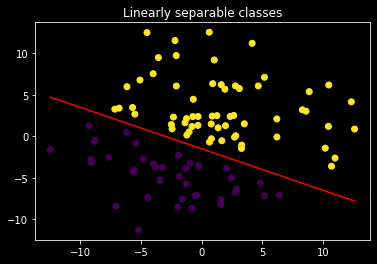

In [3]:
# set seed for reproducibility
np.random.seed(2020)

# make some dummy data
x = np.random.randn(100,2)*5
w_star = np.array([1,2])
b_star = 3

# making labels which are linearly seperable
y_star = ((x @ w_star) + b_star > 0).astype(np.int)

# make two classes further apart
x[np.where(y_star==0),1] += -1
x[np.where(y_star==1),1] += 1

# decision boudary
decision_x = np.arange(start=x.min(), stop=x.max()+0.1, step=0.1)
decision_y = -(b_star/w_star[1]) - (w_star[0]/w_star[1])*decision_x

# visualise
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y_star)
ax.plot(decision_x,decision_y,c='red')
plt.title("Linearly separable classes")
plt.savefig(plot_out_dir + '/perceptron1.png', dpi=400, transparent=True)

Algorithm halted after 8 iterations
The fitted decision boundary is different to original, but has accuracy: 100.0%


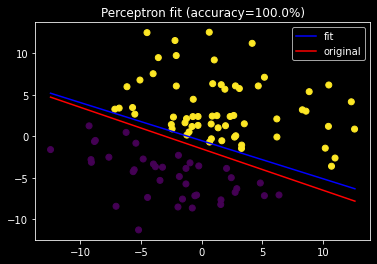

In [4]:
# fit a perceptron
p = Perceptron(random_state=2020)
p.fit(x, y_star)
decision_y_fit = -(p.intercept_[0]/p.coef_[0][1]) - (p.coef_[0][0]/p.coef_[0][1])*decision_x
accuracy = p.score(x, y_star)

# visualise
fig, ax = plt.subplots()
ax.plot(decision_x,decision_y_fit,c='blue',label='fit')
ax.plot(decision_x,decision_y,c='red',label='original')
ax.scatter(x[:,0], x[:,1], c=y_star)
ax.legend()
plt.title(f'Perceptron fit (accuracy={accuracy*100}%)')
plt.savefig(plot_out_dir + '/perceptron2.png', dpi=400, transparent=True)



print(f"Algorithm halted after {p.n_iter_} iterations")
print(f"The fitted decision boundary is different to original, but has accuracy: {accuracy*100}%")

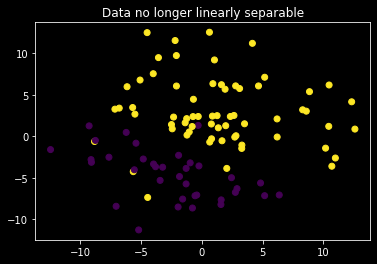

In [5]:
# what happens if not lineearly separable
y_star_2 = y_star.copy()
y_star_2[:5] = 1 - y_star_2[:5]
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y_star_2)
plt.title("Data no longer linearly separable")
plt.savefig(plot_out_dir + '/perceptron3.png', dpi=400, transparent=True)

The algorithm halted after 10000 iterations
The fitted decision boundary has accuracy: 95.0%


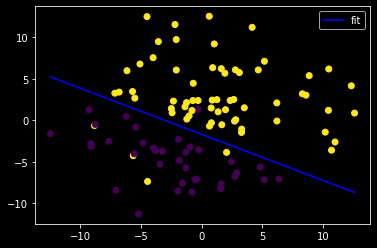

In [6]:
# fit another version
p2 = Perceptron(random_state=2020,tol=None,max_iter=1e4)
p2.fit(x, y_star_2)
decision_y_fit_2 = -(p2.intercept_[0]/p2.coef_[0][1]) - (p2.coef_[0][0]/p2.coef_[0][1])*decision_x

# visualise
fig, ax = plt.subplots()
ax.plot(decision_x,decision_y_fit_2,c='blue',label='fit')
ax.scatter(x[:,0], x[:,1], c=y_star_2)
ax.legend()

# does the fitted line find the correct boundary
accuracy = p2.score(x, y_star_2)
print(f"The algorithm halted after {p2.n_iter_} iterations")
print(f"The fitted decision boundary has accuracy: {accuracy*100}%")

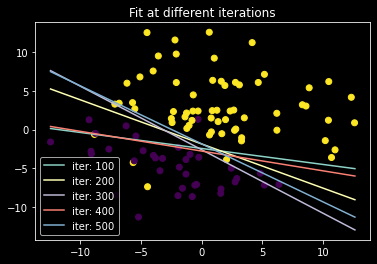

In [7]:
# ther is no guarantee the algorithm will converge towards a "good" solution when the data
# is not linearly separable. This function keeps track of error at each iteration, and plots
# the decision boundary every 100 iterations

def fit_and_return_error(num_iters):
    i = 0
    p = Perceptron(random_state=2020,tol=None)
    p.partial_fit(x,y_star_2,classes=np.unique(y_star_2))
    fig, ax = plt.subplots()
    ax.scatter(x[:,0], x[:,1], c=y_star_2)
    plt.title('Fit at different iterations')
    err = []
    while True:
        i += 1
        p.partial_fit(x,y_star_2)
        accuracy = p.score(x,y_star_2)
        err.append(1 - accuracy)
        if i % 100 == 0: 
            dec_y = -(p.intercept_[0]/p.coef_[0][1]) - (p.coef_[0][0]/p.coef_[0][1])*decision_x
            ax.plot(decision_x, dec_y, label=f'iter: {i}')
        if i == num_iters: 
            ax.legend()
            return err
        
num_iters = 500
err = fit_and_return_error(num_iters)
plt.savefig(plot_out_dir + '/perceptron4.png', dpi=400, transparent=True)

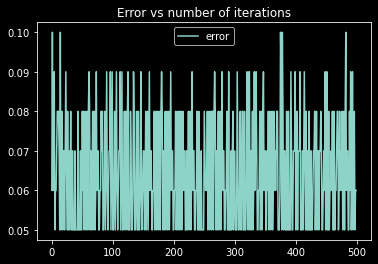

In [8]:
plt.plot(np.arange(num_iters), err, label='error')
plt.legend()
plt.title('Error vs number of iterations')
plt.savefig(plot_out_dir + '/perceptron5.png', dpi=400, transparent=True)

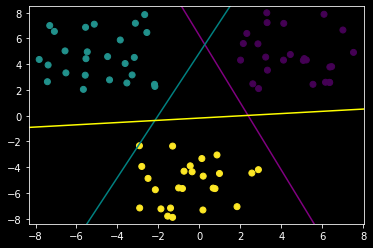

In [9]:
# make a linearly separable 3 class problem in the plane
c1 = [5,5] + (np.random.rand(25,2)*6) - 3
c2 = [-5,5] + (np.random.rand(25,2)*6) - 3
c3 = [0,-5] + (np.random.rand(25,2)*6) - 3
x = np.concatenate([c1,c2,c3])
y_star = np.concatenate([np.repeat(0,25),np.repeat(1,25),np.repeat(2,25)])

# fit linear decision boundary for each 1 vs the rest problem
p = Perceptron(tol=None)
p.fit(x,y_star)

# calculate linear decision boundary lines for each 1 vs the rest problem
decision_x = np.arange(start=x.min()-1,stop=x.max()+1,step=0.05)
linear_sep_1 = (-p.intercept_[0]/p.coef_[0][1]) - (p.coef_[0][0]/p.coef_[0][1])*decision_x
linear_sep_2 = (-p.intercept_[1]/p.coef_[1][1]) - (p.coef_[1][0]/p.coef_[1][1])*decision_x
linear_sep_3 = (-p.intercept_[2]/p.coef_[2][1]) - (p.coef_[2][0]/p.coef_[2][1])*decision_x

# plot the classification problem and fitted decision boundaries
# for each of the 1 vs the rest problems
fig, ax = plt.subplots()
ax.scatter(x[:,0],x[:,1],c=y_star)
ax.plot(decision_x,linear_sep_1,color='purple')
ax.plot(decision_x,linear_sep_2,color='teal')
ax.plot(decision_x,linear_sep_3,color='yellow')
plt.xlim([x[:,0].min()-0.5, x[:,0].max()+0.5])
plt.ylim([x[:,1].min()-0.5, x[:,1].max()+0.5])
plt.savefig(plot_out_dir + '/perceptron6.png', dpi=400, transparent=True)

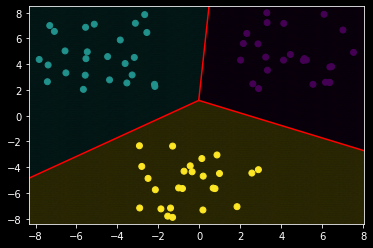

In [11]:
# make a grid of points to classify
points = np.meshgrid(decision_x,decision_x,indexing='ij')
x1 = points[0].reshape(-1,1)
x2 = points[1].reshape(-1,1)
xx = np.concatenate([x1,x2],axis=1)

# get the class of each point in the grid
y_grid = np.argmax(p.decision_function(xx), axis=1)

# compute the maximum margin decision boundaires analytically

# compute point where maximum margin decision bound intersect
b13, b23 = p.intercept_[0] - p.intercept_[2], p.intercept_[1] - p.intercept_[2]
w2232, w1232 = p.coef_[1,1] - p.coef_[2,1], p.coef_[0,1] - p.coef_[2,1]
w2131, w1131 = p.coef_[1,0] - p.coef_[2,0], p.coef_[0,0] - p.coef_[2,0]
numerator = (b13/w1232) - (b23/w2232)
denominator = (w2131/w2232) - (w1131/w1232)
x_intersect = numerator/denominator

# compute domain for each of the boundaries
lower_x = np.arange(start=x.min()-1,stop=x_intersect,step=0.01)
upper_x = np.arange(start=x_intersect,stop=x.max()+1,step=0.01)

# specify each of the maximum margin decision boundaries
decision_boundary_1 = \
    - (p.intercept_[1] - p.intercept_[2])/(p.coef_[1,1] - p.coef_[2,1]) \
    - ((p.coef_[1,0] - p.coef_[2,0])/(p.coef_[1,1] - p.coef_[2,1])) * lower_x
decision_boundary_2 = \
    - (p.intercept_[0] - p.intercept_[1])/(p.coef_[0,1] - p.coef_[1,1]) \
    - ((p.coef_[0,0] - p.coef_[1,0])/(p.coef_[0,1] - p.coef_[1,1])) * upper_x
decision_boundary_3 = \
    - (p.intercept_[0] - p.intercept_[2])/(p.coef_[0,1] - p.coef_[2,1]) \
    - ((p.coef_[0,0] - p.coef_[2,0])/(p.coef_[0,1] - p.coef_[2,1])) * upper_x

# visualise
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y_star)
ax.scatter(xx[:,0], xx[:,1] ,c=y_grid, alpha=0.05, s=0.5)
ax.plot(lower_x, decision_boundary_1, color='red')
ax.plot(upper_x, decision_boundary_2, color='red')
ax.plot(upper_x, decision_boundary_3, color='red')
plt.xlim([x[:,0].min()-0.5, x[:,0].max()+0.5])
plt.ylim([x[:,1].min()-0.5, x[:,1].max()+0.5])
plt.savefig(plot_out_dir + '/perceptron7.png', dpi=400, transparent=True)